In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
ML_cars_df = pd.read_csv (r'D:\cars.csv')
ML_cars_df = ML_cars_df.drop('Unnamed: 0', 1)
ML_cars_df = ML_cars_df.drop('brand_avg_price', 1)## no need for avg price
ML_cars_df = ML_cars_df.drop('modle', 1)## created the brand_category coulm instead
ML_cars_df = ML_cars_df.drop('brand', 1)## created the brand_category coulm instead
ML_cars_df

,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_category
0,40000,220000.0,0,1984,2005,4.0,1,1,0,2
1,20900,131000.0,1,1984,2006,2.0,1,1,0,2
2,38000,195000.0,1,1984,2006,4.0,1,1,1,2
3,5000,218073.0,1,1781,2006,3.0,1,1,2,2
4,17000,200000.0,1,2393,2006,3.0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...
7802,85000,92500.0,1,1461,2019,1.0,2,1,22,1
7803,95000,28000.0,1,1461,2020,3.0,1,1,22,1
7804,102000,28000.0,1,1332,2019,1.0,2,1,12,1
7805,98000,60000.0,1,1332,2019,1.0,2,1,16,1


In [3]:
columns = ML_cars_df.columns

making sure all items are integers

In [4]:
for i in columns:
    ML_cars_df[i]=pd.to_numeric(ML_cars_df[i], downcast='integer')
ML_cars_df.head()

,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_category
0,40000,220000,0,1984,2005,4,1,1,0,2
1,20900,131000,1,1984,2006,2,1,1,0,2
2,38000,195000,1,1984,2006,4,1,1,1,2
3,5000,218073,1,1781,2006,3,1,1,2,2
4,17000,200000,1,2393,2006,3,1,1,3,2


In [5]:
ML_cars_df.corr()

,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_category
price,1.000000,-0.512763,0.124886,0.336956,0.600385,-0.300906,0.242145,-0.028012,-0.011468,0.572906
kilometers,-0.512763,1.000000,0.012831,0.140780,-0.684235,0.372686,-0.259455,0.028073,0.011986,-0.149416
stick,0.124886,0.012831,1.000000,0.236894,-0.031805,-0.022952,-0.075220,-0.027304,0.002400,0.070493
engine,0.336956,0.140780,0.236894,1.000000,-0.138357,0.083830,-0.008715,0.000473,0.002752,0.369195
year,0.600385,-0.684235,-0.031805,-0.138357,1.000000,-0.450338,0.186382,-0.072854,-0.012478,0.172721
hand,-0.300906,0.372686,-0.022952,0.083830,-0.450338,1.000000,-0.505312,0.069630,-0.003220,-0.022329
last_owner,0.242145,-0.259455,-0.075220,-0.008715,0.186382,-0.505312,1.000000,-0.040845,-0.007147,0.082871
curr_owner,-0.028012,0.028073,-0.027304,0.000473,-0.072854,0.069630,-0.040845,1.000000,0.012232,0.019788
city,-0.011468,0.011986,0.002400,0.002752,-0.012478,-0.003220,-0.007147,0.012232,1.000000,-0.033250
brand_category,0.572906,-0.149416,0.070493,0.369195,0.172721,-0.022329,0.082871,0.019788,-0.033250,1.000000


## spliting the data

In [6]:
np.random.seed(0)
df_train, df_test = train_test_split(ML_cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [7]:
scaler = MinMaxScaler()

In [8]:
num_vars =['price','kilometers','stick','engine','year','hand','last_owner','curr_owner','city','brand_category']

array = scaler.fit_transform(df_train[num_vars])

numpy_array = np.array(array)
df_train = pd.DataFrame(numpy_array)

df_train= df_train.rename(columns = {0:'price',1:'kilometers',2:'stick',3:'engine',4:'year',5:'hand',
                                     6:'last_owner',7:'curr_owner',8:'city',9:'brand_category'}, inplace = False)

In [9]:
df_train.head()

,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_category
0,0.038731,0.398477,1.0,0.155003,0.368421,1.000000,0.5,1.0,0.111111,0.5
1,0.050397,0.390863,1.0,0.201439,0.368421,0.666667,0.5,1.0,0.777778,0.5
2,0.171722,0.225888,1.0,0.104208,0.894737,0.000000,1.0,1.0,0.250000,0.5
3,0.087728,0.365482,0.0,0.199259,0.578947,0.666667,0.5,1.0,0.805556,0.5
4,0.035231,0.296954,1.0,0.157619,0.526316,0.666667,0.5,1.0,0.250000,0.5


In [10]:
df_train.describe()

,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_category
count,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000
mean,0.099321,0.353898,0.896962,0.159962,0.581433,0.425268,0.531662,0.993228,0.349993,0.535231
std,0.110477,0.176619,0.304036,0.097612,0.227550,0.297082,0.292540,0.082018,0.255625,0.144119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031731,0.225888,1.000000,0.106497,0.421053,0.333333,0.500000,1.000000,0.111111,0.500000
50%,0.065212,0.347716,1.000000,0.156093,0.578947,0.333333,0.500000,1.000000,0.305556,0.500000
75%,0.125059,0.472081,1.000000,0.201221,0.736842,0.666667,0.500000,1.000000,0.555556,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X and Y sets for the model building


In [11]:
y_train = df_train.pop('price')
X_train = df_train

In [12]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 3)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [13]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('kilometers', False, 2),
 ('stick', False, 4),
 ('engine', True, 1),
 ('year', True, 1),
 ('hand', False, 7),
 ('last_owner', False, 3),
 ('curr_owner', False, 5),
 ('city', False, 6),
 ('brand_category', True, 1)]

In [14]:
col = X_train.columns[rfe.support_]
col

Index(['engine', 'year', 'brand_category'], dtype='object')

In [15]:
X_train = X_train[col]

In [16]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [17]:
lm = sm.OLS(y_train,X_train).fit()    # Running the linear model

In [18]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3469.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:16:33   Log-Likelihood:                 7198.9
No. Observations:                5464   AIC:                        -1.439e+04
Df Residuals:                    5460   BIC:                        -1.436e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2673      0.004    -69.

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [19]:
y_train_price = lm.predict(X_train)

Text(0.5, 0, 'Errors')

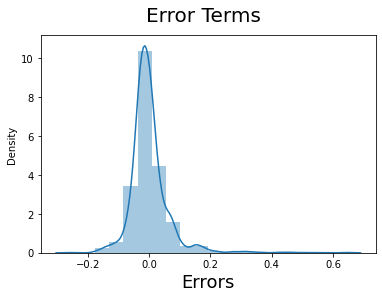

In [20]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# Making Predictions
Applying the scaling on the test sets

In [21]:
num_vars =['price','kilometers','stick','engine','year','hand','last_owner','curr_owner','city','brand_category']

array = scaler.fit_transform(df_test[num_vars])

numpy_array = np.array(array)
df_test = pd.DataFrame(numpy_array)

df_test= df_test.rename(columns = {0:'price',1:'kilometers',2:'stick',3:'engine',4:'year',5:'hand',
                                     6:'last_owner',7:'curr_owner',8:'city',9:'brand_category',}, inplace = False)

In [22]:
y_test = df_test.pop('price')
X_test = df_test

In [23]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [24]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [25]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6319831814080774

Text(0, 0.5, 'y_pred')

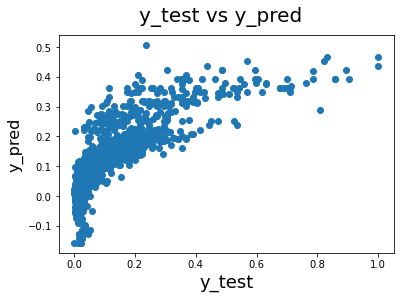

In [26]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    